In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [174]:
#data = pd.read_csv('Pong-v5_train.csv')
#data = pd.read_csv('Breakout-v5_train (3).csv')
#data = pd.read_csv('Breakout-v5_train (4).csv')
data = pd.read_csv('Pong-v5_train_LR001.csv')

In [175]:
num_gd_time_steps = data.num_gd_time_steps
episodal_reward =data.episodal_reward
averages = []
GDs = []
averaging_size = int(len(episodal_reward)/20)

In [176]:
for i in range(len(episodal_reward)-averaging_size):
    averages.append(sum(episodal_reward[i:i+averaging_size])/averaging_size)
    GDs.append(num_gd_time_steps[i+averaging_size-1])

[ 1.47761167e-06 -2.03002841e+01]


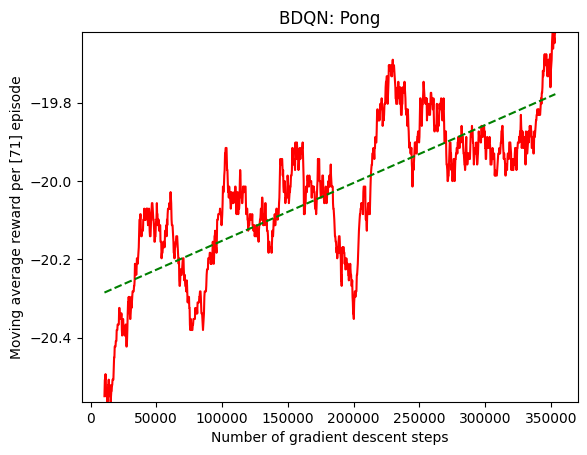

In [177]:
coef = np.polyfit(GDs,averages,1)
print(coef)
poly1d_fn = np.poly1d(coef) 
plt.plot(GDs,averages, 'r', GDs, poly1d_fn(GDs), '--g')

#plt.plot(GDs, averages, color='r')
plt.ylim(min(averages), max(averages))
plt.ylabel("Moving average reward per [%d] episode"\
%(averaging_size))
plt.xlabel("Number of gradient descent steps")
plt.title('BDQN: Pong')
plt.show()

[1]
